# Prediction of stock price

Source of data : https://finance.yahoo.com/quote/SUNPHARMA.NS/history?period1=1650780514&period2=1682316514&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

## Data prep

In [2]:
dataframe = pd.read_csv('SUNPHARMA.csv',  parse_dates=True)

In [3]:
dataframe.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
dataframe = dataframe[['Close']]  #our target column

In [5]:
dataframe

,Close
0,900.000000
1,918.049988
2,906.099976
3,921.000000
4,928.650024
...,...
242,998.700012
243,1004.799988
244,995.500000
245,987.750000


In [6]:
dataframe['Close'].isna().sum() #checking for null vlaues

0


There are no null values in the target data

In [7]:
row_count = dataframe.shape[0] # store the number of obersvations 
row_count

247

In [8]:
temps = dataframe.to_numpy() # to make things easier, we create a numpy array from our dataframe of prices
temps.shape

(247, 1)

In [9]:
sequence_length = 10  # here, lets create a variable to hold the number of days that will be in a sequence. This makes it easier to change later.

In [10]:
temps = temps[row_count % sequence_length: ] # Since our data may not be a multiple of sequence_length, we will ignore 
# the first number of days in order to make the total a number divisible by sequence length
#as there are 250 days which is multiple of 10 we will get the same number of observations
temps.shape

(240, 1)

In [11]:
temps = temps.reshape(row_count // sequence_length, sequence_length) # note that temps are a multiple of sequence length, we can split the data into rows of sequence length.
temps

array([[ 878.150024,  883.299988,  885.400024,  861.849976,  854.799988,
         850.      ,  882.5     ,  885.599976,  891.75    ,  899.150024],
       [ 884.599976,  915.650024,  922.049988,  909.900024,  911.200012,
         899.950012,  903.900024,  888.299988,  860.599976,  839.25    ],
       [ 859.549988,  865.099976,  859.799988,  848.25    ,  847.25    ,
         858.849976,  845.700012,  829.5     ,  825.049988,  822.299988],
       [ 814.599976,  793.400024,  805.299988,  817.450012,  809.299988,
         824.900024,  824.599976,  835.650024,  828.599976,  838.700012],
       [ 830.599976,  829.25    ,  829.400024,  835.799988,  837.700012,
         849.450012,  857.700012,  857.25    ,  851.599976,  860.150024],
       [ 879.900024,  878.400024,  882.799988,  875.299988,  867.5     ,
         869.650024,  874.5     ,  868.349976,  867.650024,  894.      ],
       [ 894.849976,  943.200012,  918.700012,  917.25    ,  897.      ,
         918.5     ,  915.950012,  910.400024

In [ ]:
# we can now see that our days have been organized into rows of sequence length. 

In [15]:
# Convert to dataframe

new_dataframe = pd.DataFrame(temps, columns=np.arange(0,10,1))

new_dataframe

,0,1,2,3,4,5,6,7,8,9
0,878.150024,883.299988,885.400024,861.849976,854.799988,850.000000,882.500000,885.599976,891.750000,899.150024
1,884.599976,915.650024,922.049988,909.900024,911.200012,899.950012,903.900024,888.299988,860.599976,839.250000
2,859.549988,865.099976,859.799988,848.250000,847.250000,858.849976,845.700012,829.500000,825.049988,822.299988
3,814.599976,793.400024,805.299988,817.450012,809.299988,824.900024,824.599976,835.650024,828.599976,838.700012
4,830.599976,829.250000,829.400024,835.799988,837.700012,849.450012,857.700012,857.250000,851.599976,860.150024
5,879.900024,878.400024,882.799988,875.299988,867.500000,869.650024,874.500000,868.349976,867.650024,894.000000
6,894.849976,943.200012,918.700012,917.250000,897.000000,918.500000,915.950012,910.400024,919.700012,921.049988
7,913.450012,914.599976,920.799988,916.750000,901.349976,880.549988,888.400024,881.000000,877.299988,880.150024
8,879.250000,893.049988,871.849976,869.549988,884.599976,887.750000,893.750000,894.299988,890.000000,887.700012
9,890.150024,883.750000,874.299988,868.049988,874.849976,911.950012,905.299988,908.000000,921.099976,900.700012


# standazing the data

In [16]:
# Let's create a single sequence (i.e., feature) for standardization

new_1 = np.array(temp_dataframe).ravel().reshape(-1,1)

new_1.shape

(240, 1)

In [17]:
new_1

array([[ 878.150024],
       [ 883.299988],
       [ 885.400024],
       [ 861.849976],
       [ 854.799988],
       [ 850.      ],
       [ 882.5     ],
       [ 885.599976],
       [ 891.75    ],
       [ 899.150024],
       [ 884.599976],
       [ 915.650024],
       [ 922.049988],
       [ 909.900024],
       [ 911.200012],
       [ 899.950012],
       [ 903.900024],
       [ 888.299988],
       [ 860.599976],
       [ 839.25    ],
       [ 859.549988],
       [ 865.099976],
       [ 859.799988],
       [ 848.25    ],
       [ 847.25    ],
       [ 858.849976],
       [ 845.700012],
       [ 829.5     ],
       [ 825.049988],
       [ 822.299988],
       [ 814.599976],
       [ 793.400024],
       [ 805.299988],
       [ 817.450012],
       [ 809.299988],
       [ 824.900024],
       [ 824.599976],
       [ 835.650024],
       [ 828.599976],
       [ 838.700012],
       [ 830.599976],
       [ 829.25    ],
       [ 829.400024],
       [ 835.799988],
       [ 837.700012],
       [ 8

## standardize values

In [20]:
# using StandardScaler to standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_std = scaler.fit_transform(new_1)

In [22]:
#we have 250 rows of data so we can shape them as 25 rows with 10 columns
new_reshaped = new_std.reshape(24,10)

new_reshaped.shape

(24, 10)

In [23]:
#Pandas version of the reshaped data

pd.DataFrame(new_reshaped, columns=np.arange(0,10,1))

,0,1,2,3,4,5,6,7,8,9
0,-1.001962,-0.926195,-0.895299,-1.241771,-1.345492,-1.416110,-0.937965,-0.892358,-0.801877,-0.693007
1,-0.907070,-0.450256,-0.356099,-0.534851,-0.515726,-0.681237,-0.623124,-0.852635,-1.260162,-1.574266
2,-1.275609,-1.193957,-1.271931,-1.441857,-1.456569,-1.285908,-1.479372,-1.717710,-1.783179,-1.823637
3,-1.936921,-2.248818,-2.073744,-1.894991,-2.014896,-1.785385,-1.789800,-1.627229,-1.730951,-1.582358
4,-1.701527,-1.721388,-1.719181,-1.625023,-1.597070,-1.424202,-1.302826,-1.309447,-1.392571,-1.266781
5,-0.976216,-0.998284,-0.933551,-1.043893,-1.158647,-1.127016,-1.055662,-1.146142,-1.156440,-0.768775
6,-0.756270,-0.044936,-0.405384,-0.426717,-0.724638,-0.408327,-0.445843,-0.527495,-0.390672,-0.370811
7,-0.482623,-0.465705,-0.374489,-0.434073,-0.660641,-0.966654,-0.851163,-0.960033,-1.014468,-0.972538
8,-0.985779,-0.782752,-1.094650,-1.128488,-0.907070,-0.860726,-0.772453,-0.764362,-0.827624,-0.861461
9,-0.825416,-0.919575,-1.058605,-1.150556,-1.050513,-0.504691,-0.602528,-0.562805,-0.370076,-0.670203


# Data split



In [24]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(new_reshaped,test_size=0.3)



# if we neede to maintain the ordering of the data, we can use the following code to split the data
#split_point = int(len(temp_reshaped)*0.7)
#train, test = temp_reshaped[:split_point], temp_reshaped[split_point:]

In [25]:
train.shape

(16, 10)

In [26]:
train[:2]

array([[-1.27560925, -1.19395691, -1.27193121, -1.44185654, -1.45656871,
        -1.28590795, -1.47937239, -1.71770964, -1.78317895, -1.82363741],
       [ 1.13424323,  0.88487274,  0.98197267,  0.89075707,  0.88781446,
         1.01507504,  0.89002164,  0.72303892,  0.71936088,  0.56267597]])

In [27]:
test.shape

(8, 10)

In [28]:
test[:2]

array([[0.99006419, 1.03935047, 1.0268446 , 1.06509676, 0.98712158,
        0.93195096, 0.8370582 , 0.93930704, 1.05038459, 1.30711117],
       [1.23722839, 1.51602499, 1.38949893, 1.37993746, 1.42922285,
        1.55133275, 1.29828423, 1.00992614, 0.90252663, 1.20486233]])

In [29]:
# The first 9 columns (from 0 to 9) are inputs

train_inputs = train[:,:9]

pd.DataFrame(train_inputs, columns=np.arange(0,9,1))

,0,1,2,3,4,5,6,7,8
0,-1.275609,-1.193957,-1.271931,-1.441857,-1.456569,-1.285908,-1.479372,-1.717710,-1.783179
1,1.134243,0.884873,0.981973,0.890757,0.887814,1.015075,0.890022,0.723039,0.719361
2,-0.756270,-0.044936,-0.405384,-0.426717,-0.724638,-0.408327,-0.445843,-0.527495,-0.390672
3,-0.482623,-0.465705,-0.374489,-0.434073,-0.660641,-0.966654,-0.851163,-0.960033,-1.014468
4,0.279467,0.165448,0.094829,0.136759,0.115426,0.161034,0.075704,0.311098,0.168390
5,-0.907070,-0.450256,-0.356099,-0.534851,-0.515726,-0.681237,-0.623124,-0.852635,-1.260162
6,0.813518,0.791450,0.792922,0.717154,0.798806,0.811312,0.746578,0.924595,0.851034
7,-1.001962,-0.926195,-0.895299,-1.241771,-1.345492,-1.416110,-0.937965,-0.892358,-0.801877
8,0.685522,0.605342,0.712005,0.794393,0.823081,0.697293,0.613433,0.619317,0.873102
9,0.968731,0.917239,0.926802,1.036408,0.842207,0.771589,0.861333,0.724510,0.610491


In [30]:
train_inputs

array([[-1.27560925, -1.19395691, -1.27193121, -1.44185654, -1.45656871,
        -1.28590795, -1.47937239, -1.71770964, -1.78317895],
       [ 1.13424323,  0.88487274,  0.98197267,  0.89075707,  0.88781446,
         1.01507504,  0.89002164,  0.72303892,  0.71936088],
       [-0.75627   , -0.04493628, -0.40538433, -0.42671714, -0.72463849,
        -0.40832694, -0.44584278, -0.52749512, -0.39067216],
       [-0.4826232 , -0.46570474, -0.37448913, -0.43407323, -0.66064092,
        -0.96665378, -0.85116276, -0.96003313, -1.01446832],
       [ 0.27946678,  0.1654475 ,  0.09482929,  0.13675861,  0.11542579,
         0.16103403,  0.07570365,  0.31109829,  0.16839011],
       [-0.90706969, -0.45025626, -0.35609893, -0.53485121, -0.51572557,
        -0.68123743, -0.6231242 , -0.8526345 , -1.26016166],
       [ 0.81351821,  0.79144996,  0.7929217 ,  0.7171537 ,  0.79880604,
         0.81131191,  0.74657803,  0.92459488,  0.85103405],
       [-1.00196245, -0.92619533, -0.89529925, -1.24177145, -1

In [31]:
train_inputs.shape 

(16, 9)

In [32]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(16, 9, 1)

In [33]:
train_x

array([[[-1.27560925],
        [-1.19395691],
        [-1.27193121],
        [-1.44185654],
        [-1.45656871],
        [-1.28590795],
        [-1.47937239],
        [-1.71770964],
        [-1.78317895]],

       [[ 1.13424323],
        [ 0.88487274],
        [ 0.98197267],
        [ 0.89075707],
        [ 0.88781446],
        [ 1.01507504],
        [ 0.89002164],
        [ 0.72303892],
        [ 0.71936088]],

       [[-0.75627   ],
        [-0.04493628],
        [-0.40538433],
        [-0.42671714],
        [-0.72463849],
        [-0.40832694],
        [-0.44584278],
        [-0.52749512],
        [-0.39067216]],

       [[-0.4826232 ],
        [-0.46570474],
        [-0.37448913],
        [-0.43407323],
        [-0.66064092],
        [-0.96665378],
        [-0.85116276],
        [-0.96003313],
        [-1.01446832]],

       [[ 0.27946678],
        [ 0.1654475 ],
        [ 0.09482929],
        [ 0.13675861],
        [ 0.11542579],
        [ 0.16103403],
        [ 0.07570365],
   

In [34]:
# The last column (9) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-1.823637
1,0.562676
2,-0.370811
3,-0.972538
4,0.219883
5,-1.574266
6,1.029052
7,-0.693007
8,0.947399
9,0.635501


In [35]:
test.shape

(8, 10)

In [36]:
# The first 9 columns (from 0 to 8) are inputs

test_inputs = test[:,:9]

In [37]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(8, 9, 1)

In [38]:
# The last column (23) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,1.307111
1,1.204862
2,-1.582358
3,0.508241
4,0.303742
5,1.387294
6,-0.022133
7,-1.266781


In [39]:
performance = pd.DataFrame({"model":[], "MSE":[]})

# A normal (cross-sectional) NN

This model assumes that the data is NOT a time-series data set. It treats the data as cross-sectional and the columns being independent of each other.

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.0157
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.9541
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.8948
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.8380
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7842
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7324
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6823
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6340
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5883
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5448
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5035
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4644
Epoch 13/100
1/1 [==============================] - 0s 5ms/st

In [41]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 331ms/step


In [42]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [43]:
comparison

,actual,predicted
0,1035.099976,1014.776184
1,1028.150024,1032.649536
2,838.700012,855.912292
3,980.799988,1031.721558
4,966.900024,966.289124
5,1040.550049,1029.622803
6,944.750000,963.487427
7,860.150024,871.894287


For the cross section nn the predicted values are closer to actual and are slightly high which can be accepted.

In [46]:
from sklearn.metrics import mean_squared_error

MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [47]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Normal NN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,491.420971


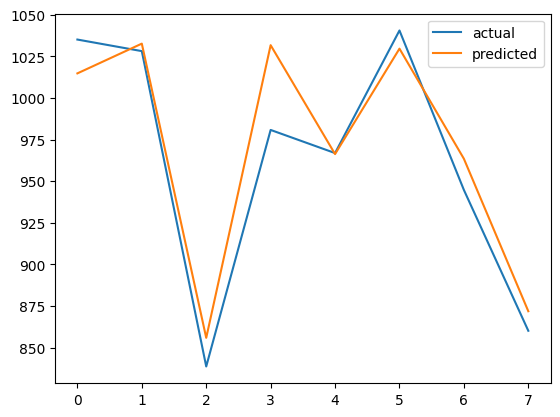

In [48]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN


In [49]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.0729
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9997
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.9322
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.8707
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.8140
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7616
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7123
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6680
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6287
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5918
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5572
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5241
Epoch 13/100
1/1 [==============================] - 0s 6ms/ste

### Predictions

In [51]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 504ms/step


In [52]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [53]:
comparison

,actual,predicted
0,1035.099976,1015.916382
1,1028.150024,1024.959473
2,838.700012,839.899719
3,980.799988,1033.169800
4,966.900024,963.381226
5,1040.550049,1024.458984
6,944.750000,953.537170
7,860.150024,859.631958


In [54]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [55]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Simple NN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,491.420971
0,Simple NN,433.876681


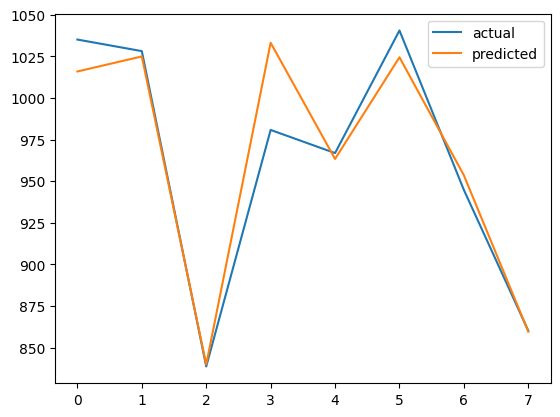

In [56]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

In [57]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 1.5443
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 1.3988
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 1.2777
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 1.1791
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 1.0977
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 1.0236
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 0.9565
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 0.8943
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 0.8366
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7821
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7317
Epoch 12/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6856
Epoch 13/100
1/1 [==============================] -

### Predictions

In [59]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 1s 984ms/step


In [60]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [61]:
comparison

,actual,predicted
0,1035.099976,1025.124634
1,1028.150024,999.886353
2,838.700012,832.827637
3,980.799988,1026.857422
4,966.900024,955.420410
5,1040.550049,1047.690186
6,944.750000,931.174500
7,860.150024,853.818970


In [62]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [63]:
performance = pd.concat([performance,pd.DataFrame({'model': 'Simple RNN with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,491.420971
0,Simple NN,433.876681
0,Simple RNN with more layers,432.656766


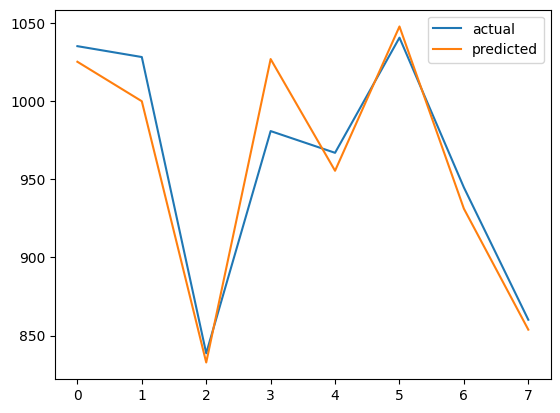

In [64]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [65]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [66]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.7784
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 0.7623
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 0.7466
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.7312
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.7160
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.7010
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6863
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.6718
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6575
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6433
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6292
Epoch 12/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6152
Epoch 13/100
1/1 [==============================] -

### Predictions

In [67]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 1s 516ms/step


In [68]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [69]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [70]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM RNN', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,491.420971
0,Simple NN,433.876681
0,Simple RNN with more layers,432.656766
0,LSTM RNN,847.637299


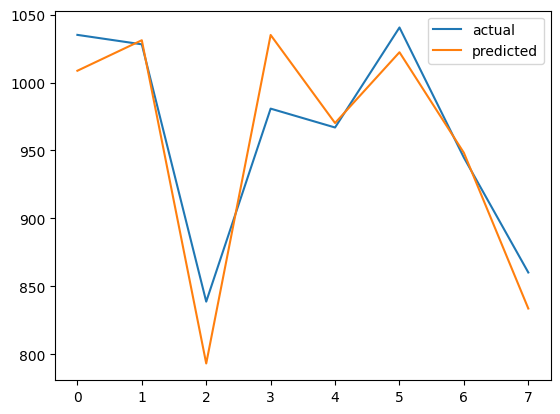

In [71]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [72]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [73]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 20s 20s/step - loss: 0.8218
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7773
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.7344
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6928
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6522
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6124
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5732
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5344
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4959
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4578
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 0.4202
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.3833
Epoch 13/100
1/1 [==============================]

### Predictions

In [74]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 3s 3s/step


In [75]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [76]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [77]:
performance = pd.concat([performance,pd.DataFrame({'model': 'LSTM RNN with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,491.420971
0,Simple NN,433.876681
0,Simple RNN with more layers,432.656766
0,LSTM RNN,847.637299
0,LSTM RNN with more layers,424.205758


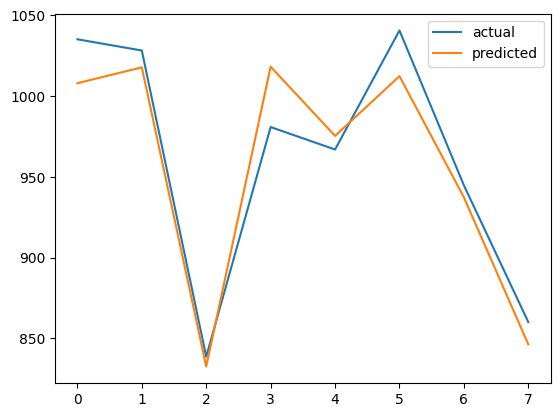

In [78]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [79]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [80]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 12s 12s/step - loss: 0.7932
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.7019
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.6365
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.5821
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.5346
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4895
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4476
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4082
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.3706
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 0.3343
Epoch 11/100
1/1 [==============================] - 0s 22ms/step - loss: 0.3002
Epoch 12/100
1/1 [==============================] - 0s 23ms/step - loss: 0.2679
Epoch 13/100
1/1 [==============================]

### Predictions

In [81]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 820ms/step


In [82]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [83]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [84]:
performance = pd.concat([performance,pd.DataFrame({'model': 'GRU with more layers', 'MSE':MSE}, index=[0])])
performance

,model,MSE
0,Normal NN,491.420971
0,Simple NN,433.876681
0,Simple RNN with more layers,432.656766
0,LSTM RNN,847.637299
0,LSTM RNN with more layers,424.205758
0,GRU with more layers,402.674419


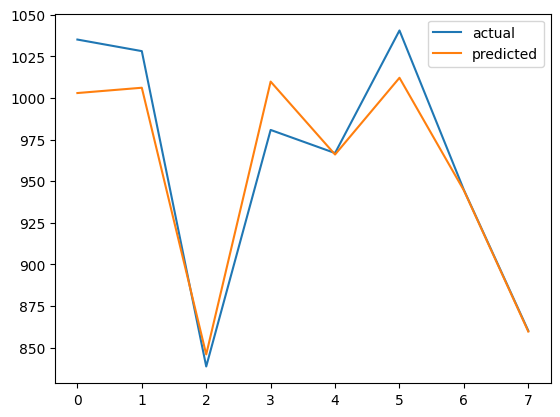

In [85]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [86]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [87]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 12s 12s/step - loss: 0.9410
Epoch 2/100
1/1 [==============================] - 0s 323ms/step - loss: 0.8897
Epoch 3/100
1/1 [==============================] - 0s 338ms/step - loss: 0.8414
Epoch 4/100
1/1 [==============================] - 0s 330ms/step - loss: 0.7960
Epoch 5/100
1/1 [==============================] - 0s 356ms/step - loss: 0.7527
Epoch 6/100
1/1 [==============================] - 0s 236ms/step - loss: 0.7116
Epoch 7/100
1/1 [==============================] - 0s 288ms/step - loss: 0.6719
Epoch 8/100
1/1 [==============================] - 0s 236ms/step - loss: 0.6334
Epoch 9/100
1/1 [==============================] - 0s 320ms/step - loss: 0.5972
Epoch 10/100
1/1 [==============================] - 0s 352ms/step - loss: 0.5620
Epoch 11/100
1/1 [==============================] - 0s 379ms/step - loss: 0.5278
Epoch 12/100
1/1 [==============================] - 0s 360ms/step - loss: 0.4943
Epoch 13/100
1/1 [====================

### Predictions

In [88]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 1s/step


In [89]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [90]:
MSE=mean_squared_error(comparison['actual'], comparison['predicted'])

In [92]:
performance.sort_values(by='MSE')

,model,MSE
0,Conv 1D,392.339374
0,GRU with more layers,402.674419
0,LSTM RNN with more layers,424.205758
0,Simple RNN with more layers,432.656766
0,Simple NN,433.876681
0,Normal NN,491.420971
0,LSTM RNN,847.637299



1) RNN model with the least MSE value has the better prediction performance, with difference of 200 units, second best model in this analysis will be the GRU with more layers for RNN

2) The models with additional layers (Deep RNN, Deep GRU, and Deep LSTM) have higher MSE values than the models with fewer levels (RNN, GRU with one layer, and LSTM with one layer), it is also important to note. This implies that increasing the number of layers may not always increase predictive accuracy and may potentially cause overfitting, in which the model becomes overly complicated and begins to closely resemble the training data, leading to subpar performance on fresh data.

3) Last but not least, the CONV1D model has a higher MSE value than some of the recurrent layer models (RNN, GRU with one layer), suggesting that a convolutional neural network may not be the optimal model for this specific application.

4) In conclusion, the presented values indicate that the RNN model, which has the lowest MSE value and beats other models by a substantial margin, is the most appropriate for the particular problem at hand. Additionally, it emphasizes how crucial it is to carefully choose the model's architecture based on the unique requirements of the problem and the characteristics of the data in order to obtain the greatest performance. 